In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from tqdm import tqdm

import os
import sys
sys.path.append(os.path.join(os.path.abspath(''), '..'))
from utils.dla import get_neighbors, new_start, next_aggregation, probability_distribution

100%|██████████| 1000/1000 [24:31<00:00,  1.47s/it] 


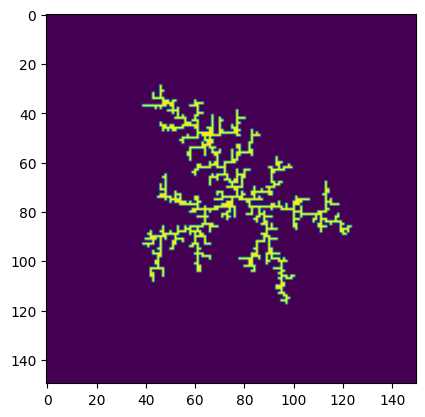

In [13]:
aggragations = 1000
size = 150

grid = np.zeros((size,size))
grid[size//2, size//2] = 1

start = new_start(grid)
neighbors = get_neighbors(grid)

grid_list = []
distribution_list = []

for i in tqdm(range(aggragations)):
    grid_list.append(grid.copy())
    n_neighbors = ((neighbors + grid) > 0).sum() - (grid > 0).sum()
    distribution_list.append(probability_distribution(grid, np.sqrt(n_neighbors).astype(int) + 6))
    
    grid[*next_aggregation(start, neighbors)] = 1
    start = new_start(grid)
    neighbors = get_neighbors(grid)

plt.imshow(grid);

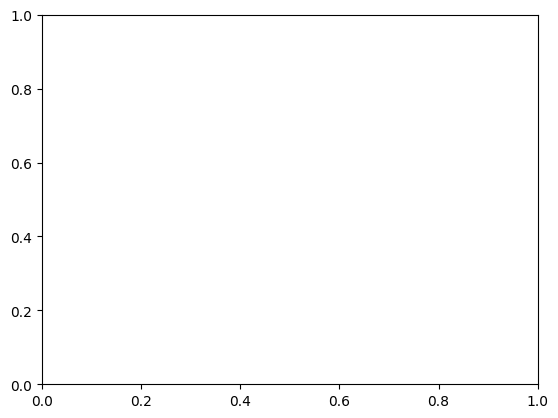

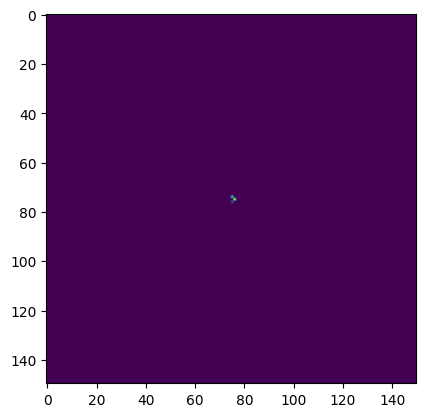

In [14]:
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    ax.imshow(distribution_list[5*i])

fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update, frames=200, interval=5)

writer = animation.PillowWriter()
ani.save(f'../images/animation_probabilities.gif', writer=writer)